In [76]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

def fold_K(X, y, model):    
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    acc_test_score = []
    acc_train_score = []
    rec_test_score = []
    rec_train_score = []
    
    for train_index, test_index in kf.split(X): # 5번
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        acc_train_score.append(accuracy_score(y_train,y_pred_train))
        acc_test_score.append(accuracy_score(y_test,y_pred))
        
        rec_train_score.append(recall_score(y_train , y_pred_train))
        rec_test_score.append(recall_score(y_test , y_pred))

        
    print('정확도 : train score : {}'.format(np.array(acc_train_score).mean()))
    print('정확도 : test score : {}'.format(np.array(acc_test_score).mean()))
    # print('재현율 : train score : {}'.format(np.array(rec_train_score).mean()))
    # print('재현율 : test score : {}'.format(np.array(rec_test_score).mean()))

# 파일불러오기

In [77]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/ML_project_predict_heart_disease/data/heart_2020_final.csv')
# df.dropna(axis = 0, inplace = True)
X = df.drop(columns = 'HeartDisease').values
y = df['HeartDisease']

smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X,y)

In [10]:
df[df['SleepTime'] >= 20]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Verygood,Diabetic_No,Diabetic_Noborderlinediabetes,Diabetic_Yes,Diabetic_Yesduringpregnancy
2179,0,17.63,0,0,0,30.0,0.0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
5019,0,25.80,1,0,0,0.0,0.0,0,1,1,...,1,0,1,0,0,0,1,0,0,0
5512,1,25.00,1,1,0,0.0,0.0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
12301,0,28.15,1,0,0,7.0,30.0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
15683,1,24.41,0,0,0,20.0,0.0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289561,1,31.32,0,0,0,0.0,0.0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
290528,0,37.41,0,0,0,5.0,5.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
290893,0,19.80,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
292274,0,19.64,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


# 그리드서치

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV


# X_smote_train , X_smote_test , y_smote_train , y_smote_test = train_test_split(X_smote,y_smote,test_size = 0.2 , random_state=42)

# # CatBoost 모델을 만듭니다.
# catboost = CatBoostClassifier(random_state = 42, task_type="GPU",)

# # 하이퍼파라미터 후보군을 지정합니다.
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'depth': [3, 6, 9],
#     'l2_leaf_reg': [1, 3, 5],
#     'bagging_temperature': [0, 1, 10]
# }

# # 그리드 서치를 수행합니다.
# grid_search = GridSearchCV(estimator=catboost , param_grid = param_grid, cv=3)
# grid_search.fit(X_smote_train, y_smote_train)

# 그리드 서치 결과 kfold 검증

### 결과(random_state = 42, task_type = 'GPU')
-> bagging_temperature = 0, depth = 9, l2_leaf_reg = 3, learning_rate =0.1

In [ ]:
# CatBoost 모델을 만듭니다.
catboost = CatBoostClassifier(random_state = 42, bagging_temperature = 0, depth = 9, l2_leaf_reg = 3, learning_rate =0.1, task_type="GPU")
fold_K(X_smote, y_smote, catboost)


In [11]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_1824', 'AgeCategory_2529',
       'AgeCategory_3034', 'AgeCategory_3539', 'AgeCategory_4044',
       'AgeCategory_4549', 'AgeCategory_5054', 'AgeCategory_5559',
       'AgeCategory_6064', 'AgeCategory_6569', 'AgeCategory_7074',
       'AgeCategory_7579', 'AgeCategory_80orolder',
       'Race_AmericanIndianAlaskanNative', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Verygood', 'Diabetic_No', 'Diabetic_Noborderlinediabetes',
       'Diabetic_Yes', 'Diabetic_Yesduringpregnancy'],
      dtype='object')

### 결과

In [2]:
# 그냥 다 넣고 돌렸을 때 
# 정확도 : train score : 0.9531869408507291
# 정확도 : test score : 0.9357000764653762
# 재현율 : train score : 0.9240170562775416
# 재현율 : test score : 0.9009990815003835

# 인종 뺐을 때
# 정확도 : train score : 0.9503281035097396
# 정확도 : test score : 0.9329473595990929
# 재현율 : train score : 0.9197775480531885
# 재현율 : test score : 0.8976770948418903

# genhelath 뺐을 때
# 정확도 : train score : 0.9390913297023153
# 정확도 : test score : 0.9228328040616297
# 재현율 : train score : 0.9123855657466496
# 재현율 : test score : 0.8915842640436648

# diabetic 뺏을 때
# 정확도 : train score : 0.9486921401445937
# 정확도 : test score : 0.9321694570173509
# 재현율 : train score : 0.9213144303947279
# 재현율 : test score : 0.9001754061310596

# mentail health 뺐을 때 :
# 정확도 : train score : 0.9481879609681242
# 정확도 : test score : 0.931826960267987
# 재현율 : train score : 0.9173528639504658
# 재현율 : test score : 0.8966189912376115


In [60]:
data20 = df[df['BMI'] >= 20]['HeartDisease'].value_counts(normalize = True)[1]
data30 = df[df['BMI'] >= 30]['HeartDisease'].value_counts(normalize = True)[1]
data40 = df[df['BMI'] >= 40]['HeartDisease'].value_counts(normalize = True)[1]
data50 = df[df['BMI'] >= 50]['HeartDisease'].value_counts(normalize = True)[1]
data60 = df[df['BMI'] >= 60]['HeartDisease'].value_counts(normalize = True)[1]
data70 = df[df['BMI'] >= 70]['HeartDisease'].value_counts(normalize = True)[1]
data80 = df[df['BMI'] >= 80]['HeartDisease'].value_counts(normalize = True)[1]

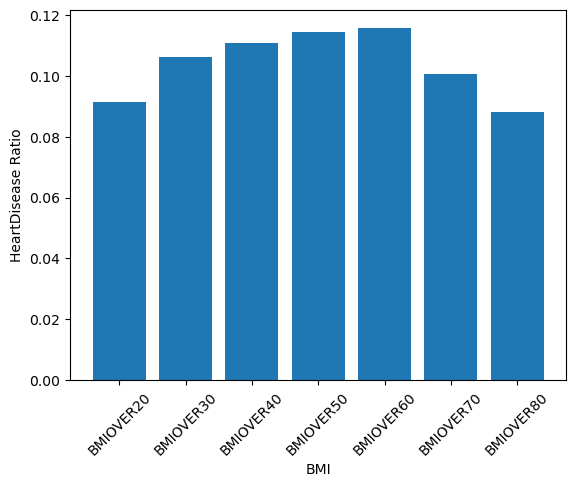

In [69]:

data = [data20, data30, data40, data50, data60, data70, data80]

# Create a bar plot
plt.bar(range(len(data)), data)

# Set the x-axis tick labels
plt.xticks(range(len(data)), ['BMIOVER20', 'BMIOVER30', 'BMIOVER40', 'BMIOVER50', 'BMIOVER60', 'BMIOVER70', 'BMIOVER80'], rotation = 45)
# Set the axis labels
plt.xlabel('BMI')
plt.ylabel('HeartDisease Ratio')

# Show the plot
plt.show()

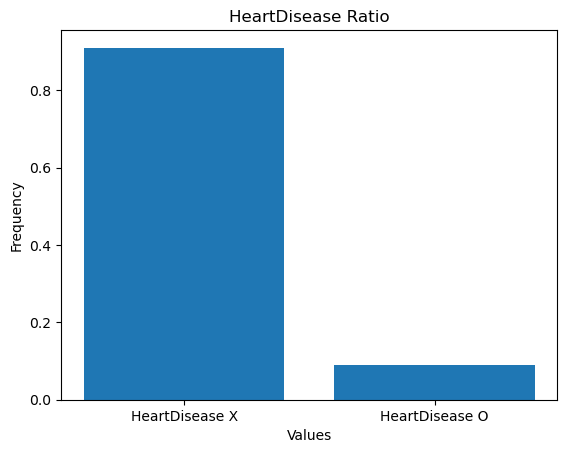

In [42]:
import matplotlib.pyplot as plt

data = df['HeartDisease'].value_counts(normalize = True)
x_labels = ['HeartDisease X', 'HeartDisease O']

plt.bar(x_labels, data)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('HeartDisease Ratio')

plt.show()